# ***ProbaSorte:*** Explorando Padrões e Probabilidades nos Resultados da Loteria (1996-2024)

Este projeto, propõe-se a explorar e decifrar os padrões por trás dos resultados de loteria no período de 1996 a 2024. Ao examinar meticulosamente os números sorteados, nossa missão é revelar insights valiosos, desde os números mais frequentes até as combinações menos usuais.

### Objetivo do Projeto

Durante as últimas décadas, a loteria tem sido uma fonte de empolgação e especulação. Neste projeto, nosso objetivo é lançar luz sobre os seguintes aspectos:

- Identificar o valor médio de prêmios, números de ganhadores e têndencias dos sorteios.

- Identificar a Integridade da Mega Sena como jogo aleatório.

- Probabilidades: Calcular e explorar as probabilidades associadas a diferentes números e combinações, oferecendo uma visão mais profunda sobre a aleatoriedade do sorteio.

*Primeiro será feito o tratamento e limpeza dos dados.Em seguida, será feito a análise explorátoria dos valores dos prêmios e quantidade de ganhadores. Finalizando com a validação da integridade da Mega Sena e identificação de possíveis estratégias para o aumento da probabilidade de ganho.*

### Pré-Processamento

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

In [2]:
# carregando dados da Mega Sena até 2024
try:
    mega = pd.read_csv('mega_sena.csv', header=1)
except FileNotFoundError:
    print("O arquivo CSV não foi encontrado em nenhuma das localizações especificadas.")

#### Identificando problemas

In [3]:
# primeiras impressões
mega.info()
mega.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Conc.   2675 non-null   int64 
 1   Data    2675 non-null   object
 2   1       2675 non-null   int64 
 3   2       2675 non-null   int64 
 4   3       2675 non-null   int64 
 5   4       2675 non-null   int64 
 6   5       2675 non-null   int64 
 7   6       2675 non-null   int64 
 8   Gan.    2675 non-null   int64 
 9   Prêmio  606 non-null    object
dtypes: int64(8), object(2)
memory usage: 209.1+ KB


,Conc.,Data,1,2,3,4,5,6,Gan.,Prêmio
0,2675,13/01/2024,1,26,31,34,42,45,0,NaN
1,2674,11/01/2024,8,14,15,21,23,46,0,NaN
2,2673,09/01/2024,4,27,35,45,52,56,0,NaN
3,2672,06/01/2024,10,13,20,40,43,56,1,"6,480,136.97"
4,2671,04/01/2024,16,19,43,53,57,58,0,NaN


In [4]:
mega.describe()

,Conc.,1,2,3,4,5,6,Gan.
count,2675.00,2675.00,2675.00,2675.00,2675.00,2675.00,2675.00,2675.00
mean,1338.00,8.61,17.35,26.36,35.07,43.57,52.17,0.34
std,772.35,7.00,9.14,9.97,9.77,9.04,7.00,1.29
min,1.00,1.00,2.00,3.00,8.00,11.00,22.00,0.00
25%,669.50,3.00,10.00,19.00,28.00,38.00,49.00,0.00
50%,1338.00,7.00,16.00,26.00,35.00,45.00,54.00,0.00
75%,2006.50,12.00,23.00,33.00,42.00,51.00,58.00,0.00
max,2675.00,50.00,51.00,56.00,58.00,59.00,60.00,52.00


Problemas encontrados:
- Os nomes das colunas devem ficar em letra minúscula e devem ser claros;
- A coluna **Data** está como *object*, deve ser *datetime*;
- A coluna **Prêmio** está como *object*, deve ser *float*;
- A coluna **Prêmio** possui valores ausentes;

#### Correção dos Problemas

Renomeando as colunas

In [5]:
# Alterando nome das colunas
mega.columns= ['concurso', 'data','n1','n2','n3','n4','n5','n6','num_ganhadores','premio']

# Visualizando
mega.columns

Index(['concurso', 'data', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6',
       'num_ganhadores', 'premio'],
      dtype='object')

Corrigindo a coluna **data** e **premio**

In [6]:
# transformando a coluna data de object pata datetime
mega['data'] = pd.to_datetime(mega['data'], format="%d/%m/%Y")

# Criação da coluna ano
mega['ano'] = pd.to_datetime(mega['data']).dt.year

# Visualizando
mega['data'].head()

0   2024-01-13
1   2024-01-11
2   2024-01-09
3   2024-01-06
4   2024-01-04
Name: data, dtype: datetime64[ns]

In [7]:
# transformando a coluna premio de object para float
mega['premio'] = mega['premio'].str.replace(',', '').astype(float)

# Visualizando
display(mega['premio'].head(10))
print()
mega.info()

0            NaN
1            NaN
2            NaN
3     6480136.97
4            NaN
5   117778204.25
6            NaN
7            NaN
8            NaN
9    30781665.32
Name: premio, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   concurso        2675 non-null   int64         
 1   data            2675 non-null   datetime64[ns]
 2   n1              2675 non-null   int64         
 3   n2              2675 non-null   int64         
 4   n3              2675 non-null   int64         
 5   n4              2675 non-null   int64         
 6   n5              2675 non-null   int64         
 7   n6              2675 non-null   int64         
 8   num_ganhadores  2675 non-null   int64         
 9   premio          606 non-null    float64       
 10  ano             2675 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 230.0 KB


In [8]:
mega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   concurso        2675 non-null   int64         
 1   data            2675 non-null   datetime64[ns]
 2   n1              2675 non-null   int64         
 3   n2              2675 non-null   int64         
 4   n3              2675 non-null   int64         
 5   n4              2675 non-null   int64         
 6   n5              2675 non-null   int64         
 7   n6              2675 non-null   int64         
 8   num_ganhadores  2675 non-null   int64         
 9   premio          606 non-null    float64       
 10  ano             2675 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 230.0 KB


Corrigindo os valores nulos

In [9]:
# Visualizando numero de valores nulos
mega.isna().sum()

concurso             0
data                 0
n1                   0
n2                   0
n3                   0
n4                   0
n5                   0
n6                   0
num_ganhadores       0
premio            2069
ano                  0
dtype: int64

As linhas que possuem valor nulo na coluna **premio** são os concursos que não houveram vencedores.

Sendo assim, os valores nulos serão substituídos por 0.

In [10]:
# Substituindo valores nulos
mega['premio'].fillna(0, inplace=True)

# Visualizando numero de valores nulos
mega.isna().sum()

concurso          0
data              0
n1                0
n2                0
n3                0
n4                0
n5                0
n6                0
num_ganhadores    0
premio            0
ano               0
dtype: int64

Procurando por linhas duplicadas.

In [11]:
mega.duplicated().sum()

0

Sem duplicados.

Todos os problemas foram corrigidos, seguirei para a análise exploratória.

### EDA

#### Investigando a quantidade de ganhadores

In [12]:
display(mega.head(10))
# Visualizando distribuição
mega.describe()

,concurso,data,n1,n2,n3,n4,n5,n6,num_ganhadores,premio,ano
0,2675,2024-01-13,1,26,31,34,42,45,0,0.00,2024
1,2674,2024-01-11,8,14,15,21,23,46,0,0.00,2024
2,2673,2024-01-09,4,27,35,45,52,56,0,0.00,2024
3,2672,2024-01-06,10,13,20,40,43,56,1,6480136.97,2024
4,2671,2024-01-04,16,19,43,53,57,58,0,0.00,2024
5,2670,2023-12-31,21,24,33,41,48,56,5,117778204.25,2023
6,2669,2023-12-16,4,7,16,35,46,54,0,0.00,2023
7,2668,2023-12-14,1,27,30,41,46,57,0,0.00,2023
8,2667,2023-12-12,1,4,8,21,46,51,0,0.00,2023
9,2666,2023-12-09,5,25,29,30,43,47,1,30781665.32,2023


,concurso,n1,n2,n3,n4,n5,n6,num_ganhadores,premio,ano
count,2675.00,2675.00,2675.00,2675.00,2675.00,2675.00,2675.00,2675.00,2675.00,2675.00
mean,1338.00,8.61,17.35,26.36,35.07,43.57,52.17,0.34,5456671.64,2011.08
std,772.35,7.00,9.14,9.97,9.77,9.04,7.00,1.29,17224981.37,7.55
min,1.00,1.00,2.00,3.00,8.00,11.00,22.00,0.00,0.00,1996.00
25%,669.50,3.00,10.00,19.00,28.00,38.00,49.00,0.00,0.00,2005.00
50%,1338.00,7.00,16.00,26.00,35.00,45.00,54.00,0.00,0.00,2011.00
75%,2006.50,12.00,23.00,33.00,42.00,51.00,58.00,0.00,0.00,2018.00
max,2675.00,50.00,51.00,56.00,58.00,59.00,60.00,52.00,289420865.00,2024.00


Identificando a quantidade de ganhadores

In [13]:
#Identificando o número de ganhadores
print('Quantidade de ganhadores desde 1996:' )
print(mega['num_ganhadores'].sum())
print('')

print('Média de ganhadores por ano:' )
print(mega['num_ganhadores'].sum() / 28)
print('')

print('Número máximo de ganhadores por Concurso:' )
print(mega['num_ganhadores'].max())
print('')


Quantidade de ganhadores desde 1996:
919

Média de ganhadores por ano:
32.82142857142857

Número máximo de ganhadores por Concurso:
52



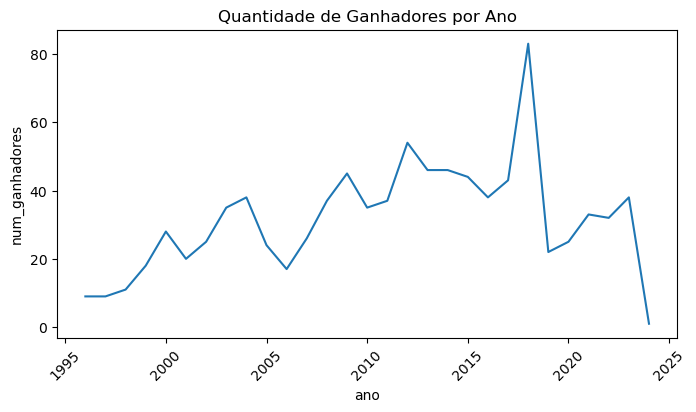

In [14]:
# Criando uma tabela de ganhadores por ano
mega_winners_sum = mega.pivot_table(index='ano', values='num_ganhadores', aggfunc='sum').reset_index()

# Configurando o tamanho da figura
plt.figure(figsize=(8, 4))

# Grafico de linha de ganhadores por ano
sns.lineplot(x=mega_winners_sum['ano'], y=mega_winners_sum['num_ganhadores'])

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45) 

# Adicionando título ao gráfico
plt.title('Quantidade de Ganhadores por Ano')

# Exibindo o gráfico
plt.show()


Houve um crescimento constante de do número de ganhadores ao longo dos anos com um pico em 2018. Não estã claro por que houve um número desproporcinal de ganhadores em 2018, mas está claro que a pandemia fez com que houvesse uma que no número de ganhadores pela queda no número de jogares.

#### Investigando os valores dos prêmios

In [15]:
print('Porcentagem de concursos que não houveram vencedores:')

# Porcentagem de concurso que não houveram vencedores
len(mega[mega['premio'] == 0]) / len(mega)

Porcentagem de concursos que não houveram vencedores:


0.7734579439252336

A grande maioria dos sorteios não tem um vencedor.

In [16]:
print('Soma de todos os prêmios sorteados:')
print(mega['premio'].sum())
print('')

print('Prêmio médio por sorteio:')
print(mega['premio'].mean())
print('')

print('Prêmio médio por sorteio (sorteios com ganhadores):')
print(mega[mega['premio']!=0]['premio'].mean())

Soma de todos os prêmios sorteados:
14596596643.59

Prêmio médio por sorteio:
5456671.64246355

Prêmio médio por sorteio (sorteios com ganhadores):
24086793.141237617


Um prêmio médio é de 5 milhões, considerando os apenas os sorteios que houveram ganhadores o prêmio médio é de 24 milhões. E 14 bilhões foi o total acumulado dos sorteios desde 1996.

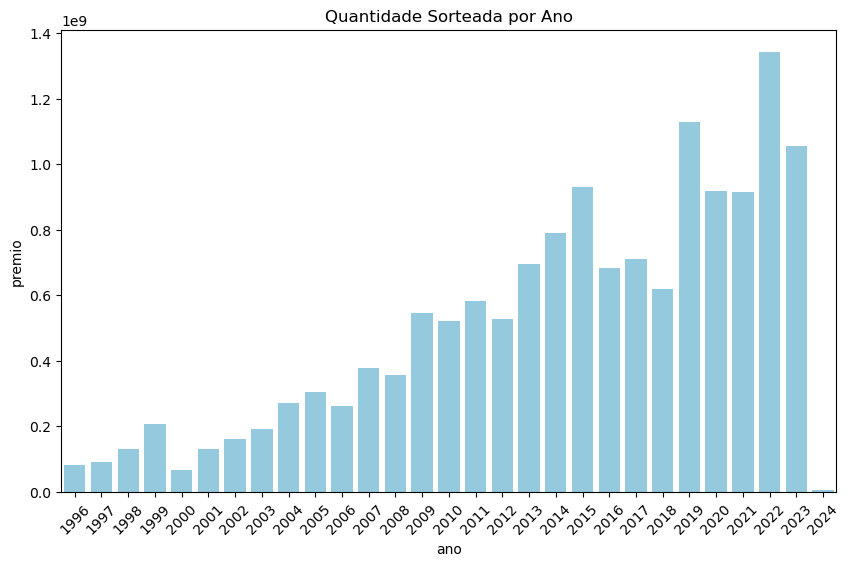

In [17]:
# Criando uma tabela de total sorteado por ano
prize_sum_year = mega.pivot_table(index='ano', values='premio', aggfunc='sum').reset_index()

# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Criando um gráfico de barras com a soma dos prêmios por ano
sns.barplot(x=prize_sum_year['ano'], y=prize_sum_year['premio'], color='skyblue')

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45) 

# Adicionando título ao gráfico
plt.title('Quantidade Sorteada por Ano')

# Exibindo o gráfico
plt.show()

A quantidade de dinheiro sorteado todo ano segue uma tendência de crescimento constante, considerando a inflação o crescimento parece continuar positivo.

Em apenas 23 % dos concursos houveram ganhadores, com um prêmio médio por concurso de 23 milhões e com um crescimento continuo da quantidade sorteada.

### Analisando a Integridade da Mega Sena

Será analisado se a Mega Sena é uma loteria honesta, sendo necessário para definir estratégias para o ganho de sorteios. 

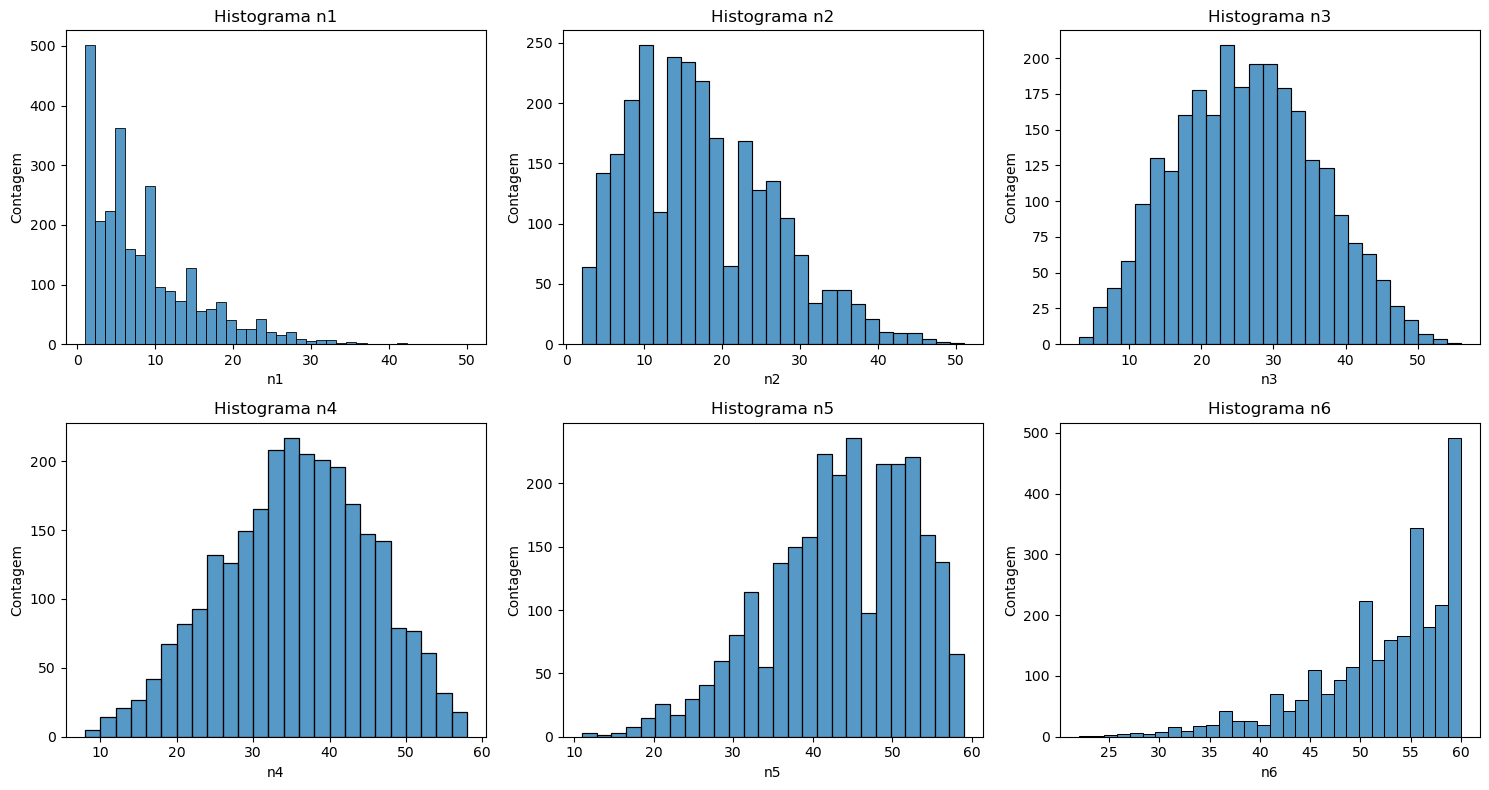

In [18]:
# Importe as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# Crie uma figura com duas linhas e três colunas
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Reshape do array de eixos para facilitar o acesso
axes = axes.flatten()

# Loop sobre as colunas de n1 a n6
for i in range(1, 7):
    # Selecione o eixo apropriado
    ax = axes[i - 1]
    
    # Crie o histograma usando seaborn
    sns.histplot(x=f'n{i}', data=mega, ax=ax)
    
    # Adicione rótulos e título se necessário
    ax.set_xlabel(f'n{i}')  # Rótulo do eixo x
    ax.set_ylabel('Contagem')  # Rótulo do eixo y
    ax.set_title(f'Histograma n{i}')  # Título do gráfico

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exiba os gráficos
plt.show()


Quando os números são apresentados eles são passado em ordem crescente, os gráficos não apresentam nenhuma irregularidade.

In [19]:
# Criação de uma lista com todos os numeros sorteados
mega_num = mega[['n1', 'n2', 'n3', 'n4', 'n5', 'n6']]

mega_list = mega_num.values.flatten().tolist()

# Tamanho da lista
print('Quantidade de números sortedados desde 1996:')
len(mega_list)

Quantidade de números sortedados desde 1996:


16050

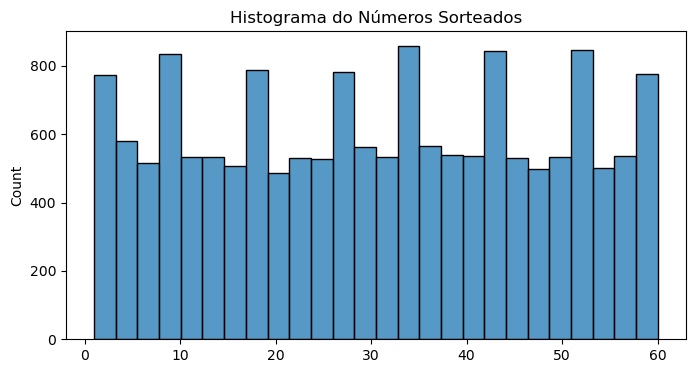

In [20]:
# Configurando o tamanho da figura
plt.figure(figsize=(8, 4))

# Histograma da lista
sns.histplot(data=mega_list)

# Adicionando título ao gráfico
plt.title('Histograma do Números Sorteados')

# Exibindo o gráfico
plt.show()


A distribuição é continua e uniforme, mas ainda não houveram números o suficiente para que todos os números tenham a mesma frequência. A partir das visualização considero que a Mega Sena é justa e aleatória.

### Conclusão

A Mega Sena, desde 1996, demonstra um crescimento constante na quantidade de ganhadores por concurso, com uma média anual de cerca de 32 ganhadores com um prêmio médio de 24 milhões de reais. A quantidade de dinheiro sorteado anualmente mostra um crescimento constante, podendo ser por causa da inflação e popularização do jogo.

Em apenas 23% dos concursos houve ganhadores. A distribuição de ganhadores parece ser contínua e uniforme, sugerindo que a Mega Sena é justa e aleatória. Apesar de ainda não terem ocorrido números suficientes para uma igualdade na frequência dos números sorteados.

Sendo assim, uma possível estratégia a ser seguida é jogar nos números que menos caíram desde 1996, supondo que por tendencia eles começaram a ocorrer mais, mas não é garantido pois é uma tendência quendo se considera dezenas de milhares de números, não afetando sorteios indivíduais. Esses informações serão passadas para a equipe de DS para eles desenvolverem uma aplicação para essa estratégia.